In [2]:
import geopandas as gpd
import pandas as pd

edafologia = gpd.read_file("Clipped/Edafología.shp")

usos_de_suelo = gpd.read_file("Clipped/Usos de suelo.shp")

litologia = gpd.read_file("Clipped/Geología.shp")

precipitacion = gpd.read_file("Clipped/Precip_m_a.shp")

evapot = gpd.read_file("Clipped/Evapot.shp")

zonas_recarga = gpd.read_file("Clipped/ZdR.shp")

insumos_excel = pd.read_excel("Insumos.xlsx", sheet_name=["Edafología", "Usos de suelo", "Litología", "Precipitación", "Evapotranspiración", "Zonas de recarga"])


edafologia["VALOR"] = insumos_excel["Edafología"]["VALOR"]
usos_de_suelo["VALOR"] = insumos_excel["Usos de suelo"]["VALOR"]
litologia["VALOR"] = insumos_excel["Litología"]["VALOR"]
precipitacion["VALOR"] = insumos_excel["Precipitación"]["VALOR"]
evapot["VALOR"] = insumos_excel["Evapotranspiración"]["VALOR"]
zonas_recarga["VALOR"] = insumos_excel["Zonas de recarga"]["VALOR"]

zonas_recarga["VALOR"] = zonas_recarga["VALOR"].astype("category")
edafologia["VALOR"] = edafologia["VALOR"].astype("category")
usos_de_suelo["VALOR"] = usos_de_suelo["VALOR"].astype("category")
litologia["VALOR"] = litologia["VALOR"].astype("category")
precipitacion["VALOR"] = precipitacion["VALOR"].astype("category")
evapot["VALOR"] = evapot["VALOR"].astype("category")

<AxesSubplot: >

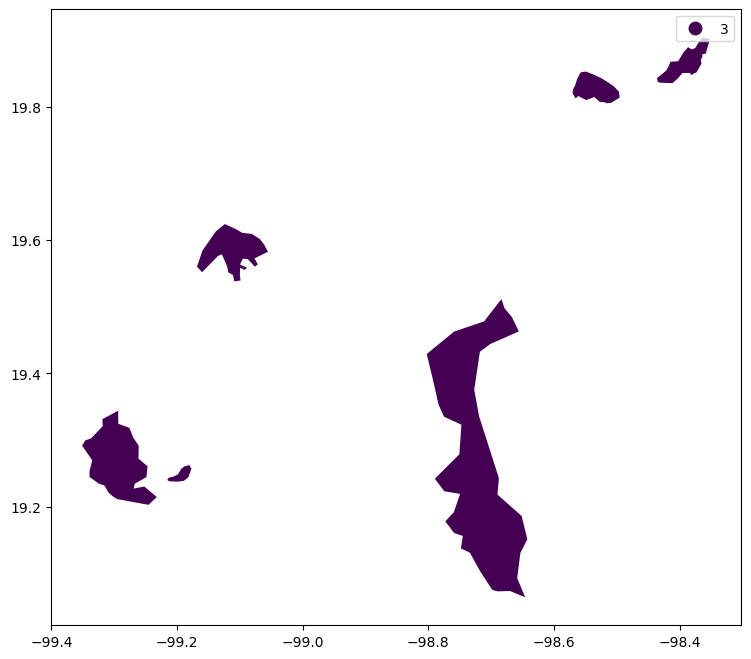

In [3]:
zonas_recarga.plot(column="VALOR", cmap='viridis', legend=True, figsize=(10, 8))

In [7]:
evapot.columns

Index(['AREA', 'PERIMETER', 'COV_ID', 'RANGO', 'VALOR', 'geometry'], dtype='object')

In [4]:
# Elegir un CRS común, en este caso "WGS 84"
crs_common = "EPSG:4326"  # EPSG code for WGS 84

# Transformar cada GeoDataFrame al CRS común
edafologia = edafologia.to_crs(crs_common)
evapot = evapot.to_crs(crs_common)
litologia = litologia.to_crs(crs_common)
precipitacion = precipitacion.to_crs(crs_common)
usos_de_suelo = usos_de_suelo.to_crs(crs_common)
zonas_recarga = zonas_recarga.to_crs(crs_common)

edafologia["edafologia"] = 1
litologia["litologia"] = 1
evapot["evapot"] = 1
precipitacion["precipitacion"] = 1
usos_de_suelo["usos_de_suelo"] = 1


litologia = litologia.rename(columns={"ROCA": "Tipo_de_roca"})
evapot = evapot.rename(columns={"RANGO": "Rango_evapotranspiracion"})
precipitacion = precipitacion.rename(columns={"RANGOS": "Rango_precipitacion"})
usos_de_suelo = usos_de_suelo.rename(columns={"DESCRIPCIO": "Descripcion_usos_de_suelo"})
zonas_recarga = zonas_recarga.rename(columns={"name":"nombre_zonas_de_recarga"})
edafologia = edafologia.rename(columns={"DESC_TEX": "Descripcion_textura", "DESCRIPCIO":"Descripcion_suelo"})




edafologia = edafologia[edafologia["VALOR"] != 0]
evapot = evapot[evapot["VALOR"] != 0]
litologia = litologia[litologia["VALOR"] != 0]
precipitacion = precipitacion[precipitacion["VALOR"] != 0]
usos_de_suelo = usos_de_suelo[usos_de_suelo["VALOR"] != 0]
zonas_recarga = zonas_recarga[zonas_recarga["VALOR"] != 0]


In [5]:
edafologia[edafologia.isna().any(axis=1)]

,AREA,PERIMETER,COV_,COV_ID,SUE1,TEX,FASFIS,FASQUIM,OBSERVACIO,Descripcion_suelo,Descripcion_textura,DESC_FASFI,DESC_FAQUI,geometry,VALOR,edafologia
0,0.01781,1.86829,14763,1150,Lv,3,0,0,NaN,LUVISOL VERTICO,FINA,ND,ND,"MULTIPOLYGON (((-98.68906 20.14731, -98.68859 ...",1.0,1
1,0.02566,3.82749,14784,1167,Hh,2,6,0,NaN,FEOZEM HAPLICO,MEDIA,LITICA,ND,"MULTIPOLYGON (((-98.75879 20.14921, -98.75492 ...",2.0,1
2,0.00391,0.30197,14971,1282,Bh,2,6,0,NaN,CAMBISOL HUMICO,MEDIA,LITICA,ND,"MULTIPOLYGON (((-98.74457 20.16946, -98.74166 ...",2.0,1
3,0.00759,0.67296,14994,1292,To,2,0,0,NaN,ANDOSOL OCRICO,MEDIA,ND,ND,"POLYGON ((-98.58953 20.09715, -98.58527 20.092...",2.0,1
4,0.03547,3.68189,15068,36,I,2,0,0,NaN,LITOSOL,MEDIA,ND,ND,"POLYGON ((-99.02402 19.94567, -99.01807 19.946...",2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,0.00057,0.11921,18217,714,Re,1,0,0,NaN,REGOSOL EUTRICO,GRUESA,ND,ND,"POLYGON ((-98.65183 19.10134, -98.65161 19.095...",3.0,1
282,0.00001,0.01409,18236,721,Th,2,0,0,NaN,ANDOSOL HUMICO,MEDIA,ND,ND,"POLYGON ((-98.90280 19.09932, -98.90263 19.099...",2.0,1
283,0.00014,0.04921,18260,726,Th,2,8,0,NaN,ANDOSOL HUMICO,MEDIA,PEDREGOSA,ND,"POLYGON ((-98.84837 19.09164, -98.85646 19.091...",2.0,1
284,0.00010,0.03996,18271,728,Th,2,5,0,NaN,ANDOSOL HUMICO,MEDIA,GRAVOSA,ND,"POLYGON ((-98.80674 19.08672, -98.81021 19.086...",2.0,1


In [6]:
def intersect_geometries(primer_gdf, segundo_gdf):
    """
    Calcula la intersección entre dos conjuntos de geometrías y suma sus valores.
    
    Parameters:
    - primer_gdf: GeoDataFrame con geometrías de un tipo 
    - segundo_gdf: GeoDataFrame con geometrías de otro tipo
    
    Returns:
    - GeoDataFrame con las geometrías de intersección y la suma de los valores 'VALOR'
    """

    columnas_deseadas = ["LITOLOGIA", "Tipo_de_roca", "Descripcion_suelo","Descripcion_textura", "Rango_evapotranspiracion", "Rango_precipitacion", "Descripcion_usos_de_suelo", "nombre_zonas_de_recarga"]

    intersections = []

    for _, eda_row in primer_gdf.iterrows():
        for _, lit_row in segundo_gdf.iterrows():
            intersection = eda_row['geometry'].intersection(lit_row['geometry'])
            if not intersection.is_empty:
                # Sumar los valores de VALOR de ambas geometrías 
                if pd.notna(eda_row['VALOR']) and pd.notna(lit_row['VALOR']):
                    total_valor = eda_row['VALOR'] + lit_row['VALOR']

                    # Crear un diccionario para almacenar los datos de la intersección
                    intersection_data = {'geometry': intersection, 'VALOR': total_valor}

                    # Agregar columnas deseadas si están presentes
                    for columna in columnas_deseadas:
                        if columna in eda_row and pd.notna(eda_row[columna]):
                            intersection_data[columna] = eda_row[columna]
                        elif columna in lit_row and pd.notna(lit_row[columna]):
                            intersection_data[columna] = lit_row[columna]

                    intersections.append(intersection_data)

    # Crear y devolver un nuevo GeoDataFrame con los resultados
    return gpd.GeoDataFrame(intersections, columns=['geometry', 'VALOR'] + columnas_deseadas)



In [7]:
intersect_edafologia_litologia = intersect_geometries(edafologia, litologia)
interseccion_edafologia_evapot_litologia = intersect_geometries(intersect_edafologia_litologia, evapot)
interseccion_edafologia_evapot_litologia_precipitacion = intersect_geometries(interseccion_edafologia_evapot_litologia, precipitacion)
interseccion_edafologia_evapot_litologia_precipitacion_usossuelo = intersect_geometries(interseccion_edafologia_evapot_litologia_precipitacion, usos_de_suelo)
interseccion_total = intersect_geometries(interseccion_edafologia_evapot_litologia_precipitacion_usossuelo, zonas_recarga)

c:\Users\Diego Arellano\AppData\Local\Programs\Python\Python310\lib\site-packages\shapely\set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
c:\Users\Diego Arellano\AppData\Local\Programs\Python\Python310\lib\site-packages\shapely\set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
c:\Users\Diego Arellano\AppData\Local\Programs\Python\Python310\lib\site-packages\shapely\set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
c:\Users\Diego Arellano\AppData\Local\Programs\Python\Python310\lib\site-packages\shapely\set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
c:\Users\Diego Arellano\AppData\Local\Programs\Python\Python310\lib\site-packages\shapely\set_operations.py:133: RuntimeWarning: invalid value encou

In [8]:
interseccion_edafologia_evapot_litologia_precipitacion_usossuelo[interseccion_edafologia_evapot_litologia_precipitacion_usossuelo["VALOR"].isna()]

,geometry,VALOR,LITOLOGIA,Tipo_de_roca,Descripcion_suelo,Descripcion_textura,Rango_evapotranspiracion,Rango_precipitacion,Descripcion_usos_de_suelo,nombre_zonas_de_recarga


In [9]:
resultado = pd.concat([interseccion_edafologia_evapot_litologia_precipitacion_usossuelo, interseccion_total])

<AxesSubplot: >

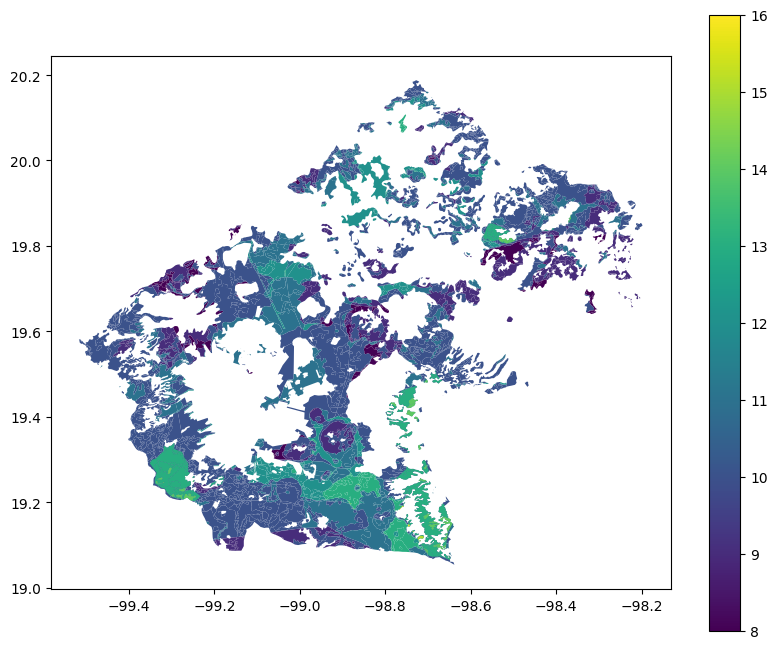

In [10]:
resultado.plot(column="VALOR", cmap='viridis', legend=True, figsize=(10, 8))

<AxesSubplot: >

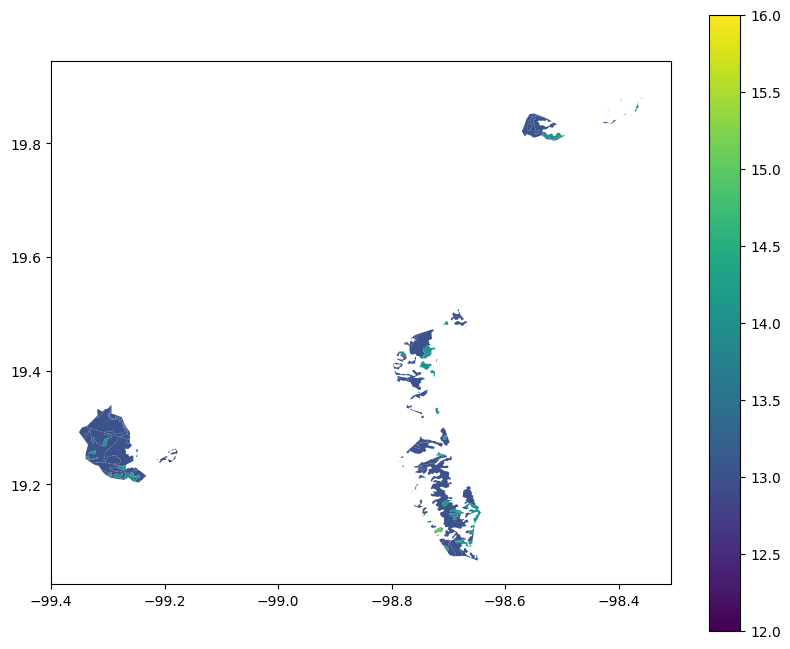

In [11]:
interseccion_total.plot(column="VALOR", cmap='viridis', legend=True, figsize=(10, 8))

In [12]:
resultado["nombre_zonas_de_recarga"] = resultado["nombre_zonas_de_recarga"].fillna("No aplica")
resultado

,geometry,VALOR,LITOLOGIA,Tipo_de_roca,Descripcion_suelo,Descripcion_textura,Rango_evapotranspiracion,Rango_precipitacion,Descripcion_usos_de_suelo,nombre_zonas_de_recarga
0,"MULTIPOLYGON (((-98.64457 20.11627, -98.64387 ...",9.0,Andesita-Dacita,Extrusiva,LUVISOL VERTICO,FINA,400-500,600 a 800 mm,BOSQUE DE OYAMEL,No aplica
1,"POLYGON ((-98.63083 20.11789, -98.63062 20.120...",9.0,Andesita-Dacita,Extrusiva,LUVISOL VERTICO,FINA,400-500,600 a 800 mm,AGRICULTURA DE TEMPORAL ANUAL,No aplica
2,"MULTIPOLYGON (((-98.61300 20.10797, -98.61319 ...",9.0,Andesita-Dacita,Extrusiva,LUVISOL VERTICO,FINA,400-500,600 a 800 mm,AGRICULTURA DE TEMPORAL ANUAL,No aplica
3,"MULTIPOLYGON (((-98.63052 20.10558, -98.63119 ...",9.0,Andesita-Dacita,Extrusiva,LUVISOL VERTICO,FINA,400-500,600 a 800 mm,VEGETACIÓN SECUNDARIA ARBUSTIVA DE BOSQUE DE E...,No aplica
4,"POLYGON ((-98.60116 20.08781, -98.60145 20.087...",9.0,Andesita-Dacita,Extrusiva,LUVISOL VERTICO,FINA,400-500,600 a 800 mm,VEGETACIÓN SECUNDARIA ARBUSTIVA DE BOSQUE DE E...,No aplica
...,...,...,...,...,...,...,...,...,...,...
167,"POLYGON Z ((-98.66550 19.09149 0.00000, -98.66...",15.0,Andesita-Dacita,Extrusiva,REGOSOL EUTRICO,GRUESA,600-700,800 a 1200 mm,PASTIZAL INDUCIDO,Sierra Nevada Izta - Popo
168,"POLYGON Z ((-98.64983 19.07068 0.00000, -98.65...",14.0,Andesita-Dacita,Extrusiva,REGOSOL EUTRICO,GRUESA,600-700,800 a 1200 mm,PRADERA DE ALTA MONTAÑA,Sierra Nevada Izta - Popo
169,"MULTIPOLYGON Z (((-98.66274 19.09083 0.00000, ...",14.0,Andesita-Dacita,Extrusiva,REGOSOL EUTRICO,GRUESA,600-700,800 a 1200 mm,PRADERA DE ALTA MONTAÑA,Sierra Nevada Izta - Popo
170,"POLYGON Z ((-98.70283 19.08856 0.00000, -98.69...",14.0,Lahar-Toba andesítica,Extrusiva,REGOSOL DISTRICO,GRUESA,600-700,800 a 1200 mm,BOSQUE DE OYAMEL,Sierra Nevada Izta - Popo


In [13]:
resultado[resultado.isna().any(axis=1)]

,geometry,VALOR,LITOLOGIA,Tipo_de_roca,Descripcion_suelo,Descripcion_textura,Rango_evapotranspiracion,Rango_precipitacion,Descripcion_usos_de_suelo,nombre_zonas_de_recarga


Modelo de aprendizaje no supervisado 

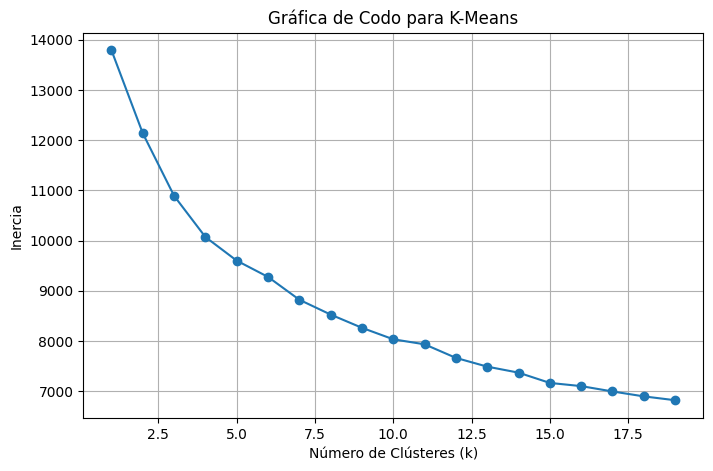

In [70]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


# Separar geometrías y datos
geometries = resultado['geometry']  # Guardar las geometrías por separado
valores = resultado['VALOR'] # Guardar el valor por separado
geodata_no_geometry = resultado.drop(columns=['geometry', 'VALOR'])

# Identificar columnas categóricas y numéricas
categorical_columns = geodata_no_geometry.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_columns = geodata_no_geometry.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Preprocesamiento: normalizar numéricas, codificar categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ]
)


data_preprocessed = preprocessor.fit_transform(geodata_no_geometry)

# Lista para almacenar la inercia para diferentes números de clústeres
inertia = []
k_range = range(1, 20)  # Probar entre 1 y 10 clústeres

# Probar K-Means con diferentes valores de k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_preprocessed)
    inertia.append(kmeans.inertia_)

# Crear la gráfica de codo
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia')
plt.title('Gráfica de Codo para K-Means')
plt.grid(True)
plt.show()


Parece que 4 clústeres es lo ideal

In [71]:
from sklearn.pipeline import Pipeline
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score


# Crear un pipeline para K-Means
kmeans_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=4, random_state=42))  # Número de clústeres inicial = 3
])

# Ajustar el modelo de K-Means
kmeans_pipeline.fit(geodata_no_geometry)

# Asignar etiquetas de clúster a los datos originales
geodata_no_geometry['cluster_kmeans'] = kmeans_pipeline.named_steps['kmeans'].labels_

# Volver a agregar la columna de geometría
geodata_with_geometry = geodata_no_geometry.copy()
geodata_with_geometry['geometry'] = geometries
geodata_with_geometry['VALOR'] = valores

# Calcular el coeficiente de silueta para evaluar el resultado de K-Means
silhouette_kmeans = silhouette_score(
    kmeans_pipeline.named_steps['preprocessor'].transform(geodata_no_geometry.drop(columns=['cluster_kmeans'])),
    geodata_no_geometry['cluster_kmeans']
)

# Probar DBSCAN
dbscan_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('dbscan', DBSCAN(eps=1.9, min_samples=5))
])

# Ajustar DBSCAN
dbscan_pipeline.fit(geodata_no_geometry)

# Asignar etiquetas de clúster a los datos originales
geodata_no_geometry['cluster_dbscan'] = dbscan_pipeline.named_steps['dbscan'].labels_

# Volver a agregar la columna de geometría a DBSCAN
geodata_with_geometry['cluster_dbscan'] = geodata_no_geometry['cluster_dbscan']

# Visualizar estadísticas descriptivas por clúster de K-Means
cluster_stats = geodata_with_geometry.groupby('cluster_kmeans').mean()

# Ahora, `geodata_with_geometry` incluye las geometrías y los clústeres asignados.

geodata_gdf = gpd.GeoDataFrame(
    geodata_with_geometry,  # DataFrame con geometrías
    geometry=geodata_with_geometry['geometry'],  # Especificar la columna de geometría
    crs="EPSG:4326"  # Sistema de referencia espacial, ajustar según tus datos
)

C:\Users\Diego Arellano\AppData\Local\Temp\ipykernel_26312\2574275100.py:45: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_stats = geodata_with_geometry.groupby('cluster_kmeans').mean()


<AxesSubplot: >

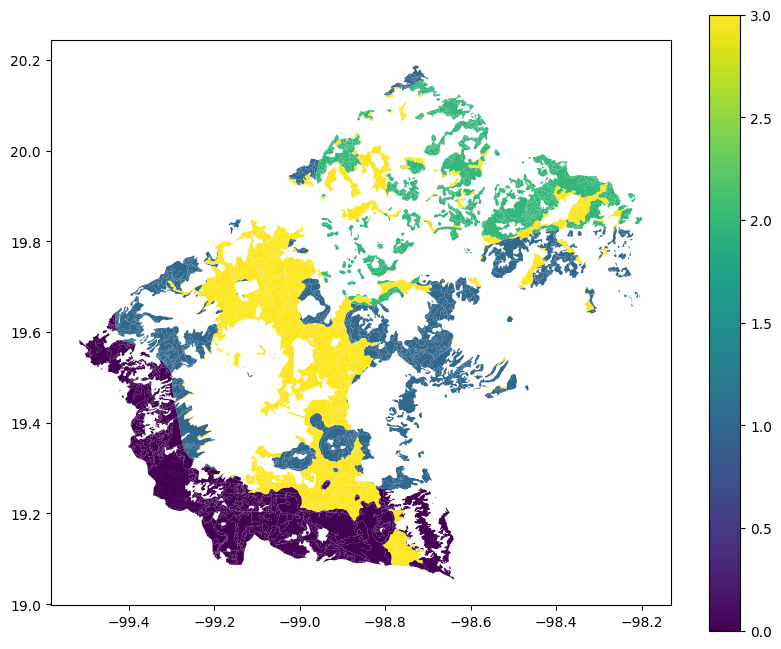

In [72]:
#geodata_gdf['cluster_kmeans'] = geodata_gdf['cluster_kmeans'].astype('category')
#geodata_gdf['cluster_dbscan'] = geodata_gdf['cluster_dbscan'].astype('category')

geodata_gdf.plot(column="cluster_kmeans", cmap='viridis', legend=True, figsize=(10, 8))



In [73]:
geodata_gdf.to_file("pronatura_datos.geojson")